In [119]:
from models import *
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def plot_project(data_2d, c_lenth=1, save=None):

    x = data_2d[:,0]
    y = data_2d[:,1]

    if type(c_lenth)==int:
        fig=plt.figure(figsize=(6,6))
        c = plt.scatter(x, y, marker='.', c='black', alpha=0.4)      
    else:
        fig=plt.figure(figsize=(8,6))
        c = plt.scatter(x, y, c=c_lenth, cmap='jet', marker='.')
        plt.colorbar(c)
    if save!=None:
        plt.savefig(save)
    plt.show()

In [121]:
path = '../4-Results/bengal/0916/lat2/'

In [3]:
x_lat = np.load(path+'/x_lat.npy')
sylla_list = np.load(path+'/../pre/sylla_list.npy')

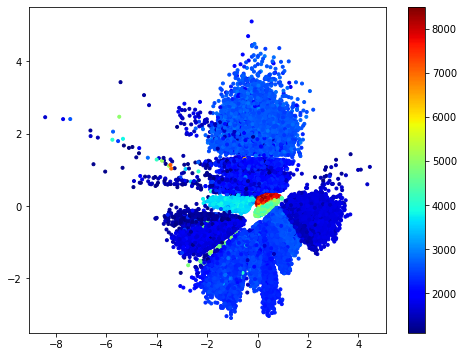

In [122]:
plot_project(x_lat, sylla_list[:,2], save=path+'/plot_Projection_dur')

In [13]:
model = tf.keras.models.load_model(path+'/model.h5', compile=False)

In [20]:
decoder = model.layers[2]

In [124]:
#sample = [[0,3],[0,2], [0,1], [0,0], [0,-1]]
y_sample = np.arange(-2,1,0.04)
#y_sample[20]=0
#y_sample.shape
x_sample = np.zeros(len(y_sample))
x_sample = x_sample-1.4
lat_sample = np.vstack((x_sample, y_sample)).T
lat_sample.shape

(75, 2)

In [125]:
decode_sample = decoder.predict(lat_sample)
decode_sample.shape

(75, 128, 64, 1)

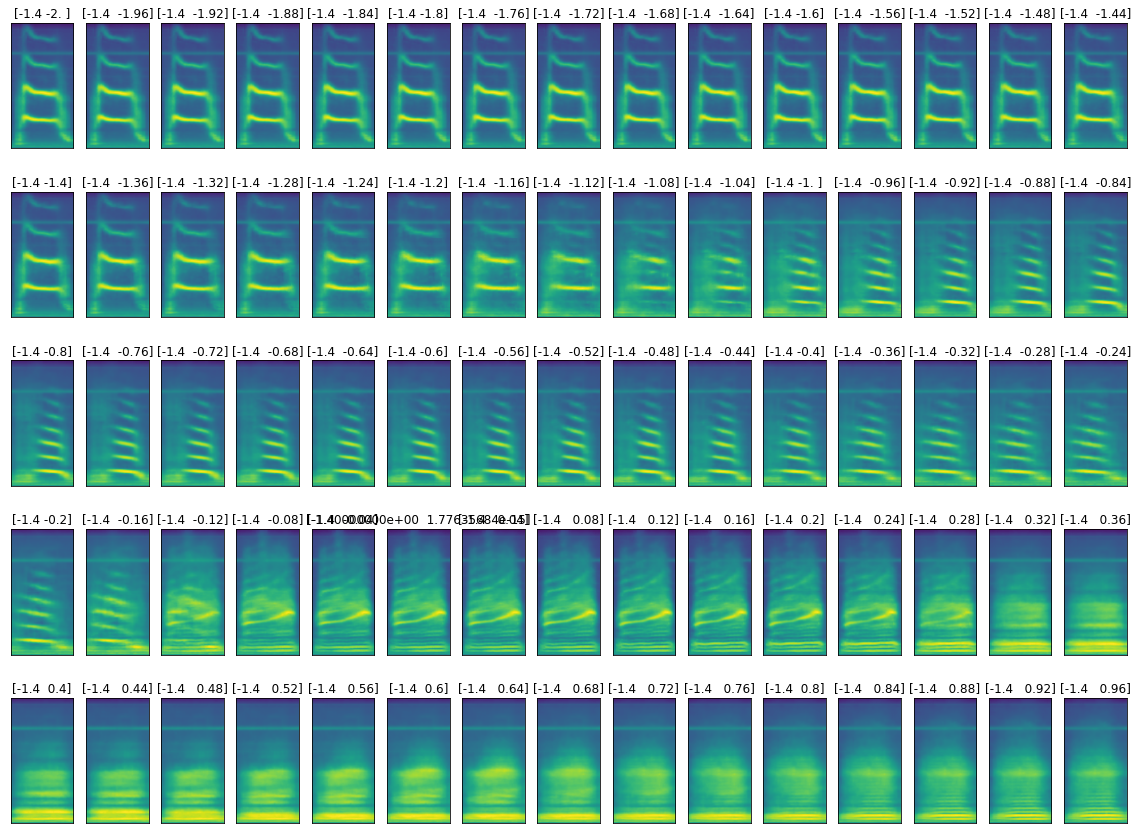

In [131]:
fig = plt.figure(figsize=(20,15))
for idx in range(len(lat_sample)):

    plt.subplot(5,len(lat_sample)/5,idx+1)
    plt.title(lat_sample[idx])
    plt.imshow(decode_sample[idx].reshape(128,64))
    plt.xticks([])
    plt.yticks([])

plt.savefig('%s/plot_continuos'%path)
plt.show()